In [1]:
def lowpass_filt(noisy_signal):
    t = np.array(df1.Time.iloc[0:300] /100)

    fc = 10 # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(3, w, 'low')
    y = signal.filtfilt(b, a, noisy_signal)
 
    
    plt.figure
    plt.ylim(0, 350)
    plt.ylabel('Volt(1/1024V)')
    plt.xlabel('Time(s)')

    plt.plot(t, noisy_signal,'lightseagreen')
    plt.plot(t,y, 'palevioletred',alpha=0.8)
    plt.legend(('noisy signal', 'filtfilt'), loc='best')
    plt.show()
    


In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv

import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
#matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


df1 = pd.read_csv(os.path.join(os.getcwd(),'data/sakai_train.tsv'), delim_whitespace=True)
df1

,Time,Trial_id,Volt,Gesture,Length
0,1,1,90,0,5
1,2,1,90,0,5
2,3,1,89,0,5
3,4,1,89,0,5
4,5,1,89,0,5
5,6,1,90,0,5
6,7,1,90,0,5
7,8,1,90,0,5
8,9,1,89,0,5
9,10,1,90,0,5


In [3]:
noisy_signal= df1.iloc[0:300,2]


df1.groupby(["Gesture", "Trial_id"], as_index=False).Volt.apply(lowpass_filt)

NameError: name 'fs' is not defined

i = 45

#df1 = df1[(df1["Gesture"] == i)]

#plt.hlines(y = i, xmin = 0, xmax = 300, lw = 2, color = 'palevioletred')


df1.index = df1["Time"]
#plt.style.use('bmh')
df1.groupby("Trial_id").Volt.plot(x="Time",alpha=0.6)
plt.ylabel('Predicted Angle(°)')
plt.xlabel('Time(0.01s)')
plt.legend()

print(df1.groupby("Trial_id").Volt)



In [ ]:
a = df1.groupby(['Gesture',"Trial_id"]).mean()
a.reset_index()
#print(a["Volt"])

df = pd.DataFrame()

df["Volt"] = a.Volt
df.Length = df1.Length



In [ ]:
X = pd.DataFrame([df.query("Gesture==90").Volt.mean()
                  ,df.query("Gesture==0").Volt.mean()])
#X = pd.DataFrame([330,70])
min = 0
max = df.Length.mean()
y = pd.DataFrame([min,max])

y

In [ ]:
#regr = LinearRegression()
from sklearn.preprocessing import PolynomialFeatures
regr = LinearRegression()
regr.fit(X, y)
y_fit = regr.predict(X)


In [103]:
dist_func = lambda x: x * regr.coef_ + regr.intercept_
df["Dist"] = df["Volt"].map(dist_func)
df["Dist"] = df["Dist"].values
df["Dist"] = df["Dist"].map(lambda x : min if x < min else (max if x > max else x))
df

NameError: name 'df' is not defined

In [104]:
import math
df["Theta"] = df["Dist"].map(lambda x : math.degrees(math.acos(x/df.Length[0])))
df["SquareTheta"] = df["Theta"].map(lambda x : x*x/90)
df.reset_index().plot(kind='scatter',x='Gesture', y='SquareTheta')

df

NameError: name 'df' is not defined

In [105]:
df
#df = df.reset_index(drop=True)
#df = df.reset_index
#df.index
df

NameError: name 'df' is not defined

In [296]:
df = df.reset_index(level='Gesture')
df

,Gesture,Volt,Dist,Theta,SquareTheta
Trial_id,,,,,
1,0,88.746667,5,0.000000,0.000000
2,0,80.690000,5,0.000000,0.000000
3,0,85.996667,5,0.000000,0.000000
4,0,88.140000,5,0.000000,0.000000
5,0,93.990000,[[4.996374189503169]],2.182134,0.052908
6,0,98.603333,[[4.894997992985704]],11.762900,1.537398
7,0,101.856667,[[4.823507264805759]],15.268694,2.590367
8,0,101.856667,[[4.823507264805759]],15.268694,2.590367
9,0,103.176667,[[4.794500780831109]],16.483768,3.019051


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


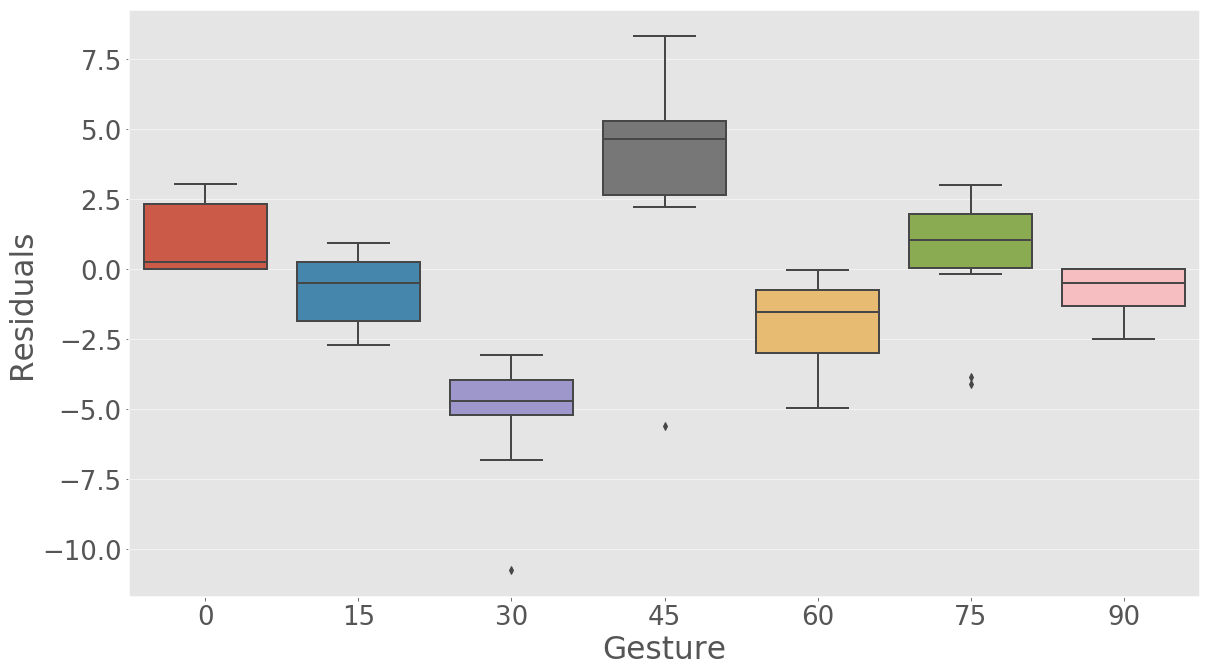

In [297]:
df["Residuals"] = df.SquareTheta - df.Gesture
sns.boxplot(x="Gesture",y="Residuals",data=df)


[[1.         0.99423888]
 [0.99423888 1.        ]]


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


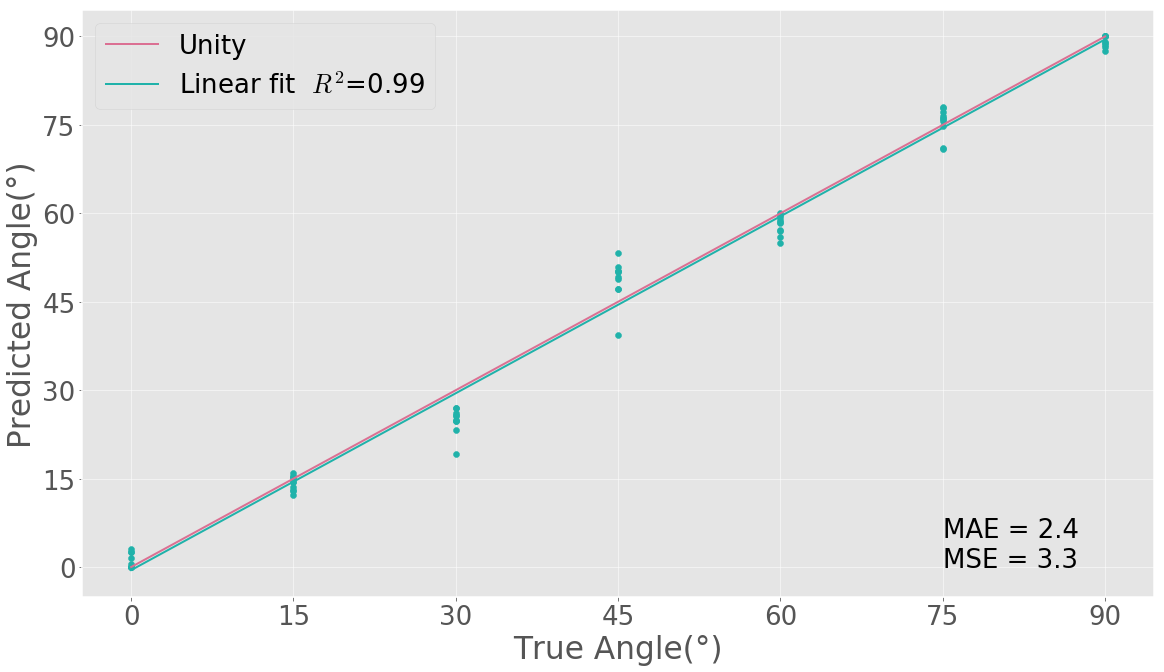

In [299]:
cols = ['Gesture', 'SquareTheta']
corr = np.corrcoef(df[cols].values.T)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(df.SquareTheta, df.Gesture)
mse = np.sqrt(mean_squared_error(df.SquareTheta, df.Gesture))

print(corr)

plt.scatter(df.Gesture, df.SquareTheta, c = 'lightseagreen',
            marker = 'o',label = None)
plt.ylabel('Predicted Angle(°)')
plt.xlabel('True Angle(°)')


x = np.arange(0,91,1)
y = x
plt.plot(x,y,lw = 2, color = 'palevioletred', label = "Unity")



X = df.Gesture.reshape(-1,1)
y = df.SquareTheta.reshape(-1,1)

cols = ['Gesture', 'SquareTheta']
corr = np.corrcoef(df[cols].values.T)

regr = LinearRegression()
regr = regr.fit(X, y)
y_fit = regr.predict(X)
plt.plot(X,y_fit,color = 'lightseagreen',label = 'Linear fit  $R^2$=%.2f'%(corr[1,0:1]))
         #\n $R^2$ = %.2f\nMAE = %.1f\nMSE = %.1f' %(corr[1,0:1],mae,mse))
plt.text(75, 0, 'MAE = %.1f\nMSE = %.1f' %(mae,mse))
plt.legend(loc = 'upper left')
plt.xticks(np.arange(0, 100, 15))
plt.yticks(np.arange(0, 100, 15))
plt.show()


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


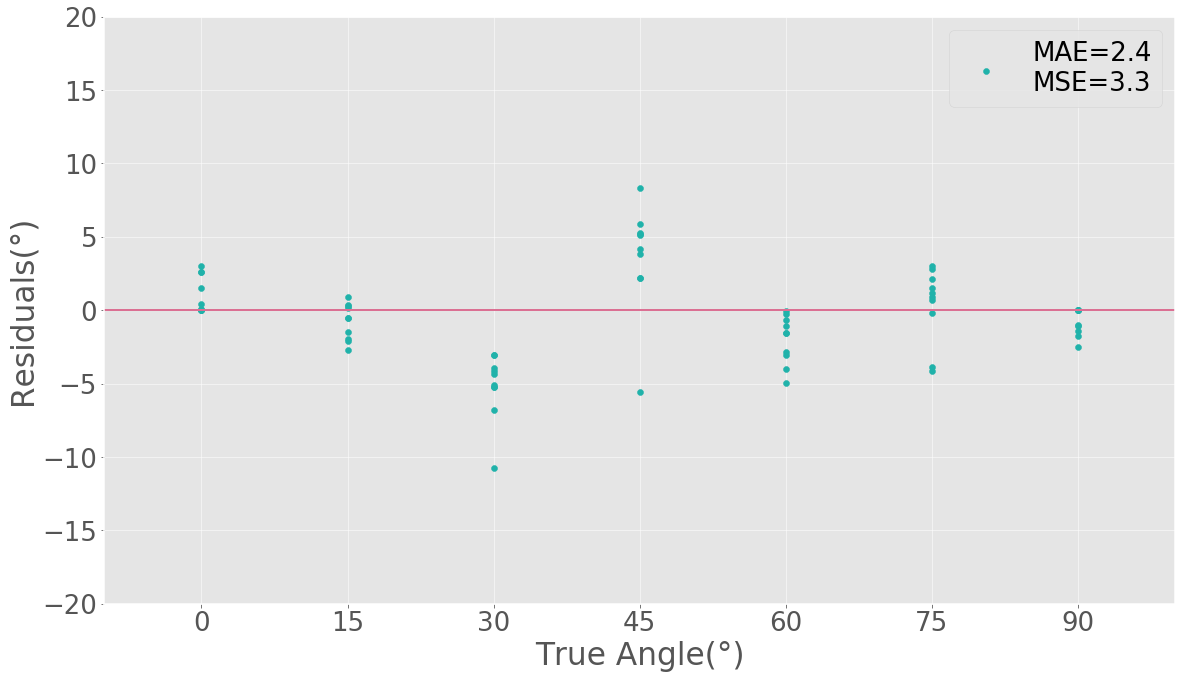

In [300]:
plt.scatter(df.Gesture, df.SquareTheta - df.Gesture  , c = 'lightseagreen', marker = 'o',label = 'MAE=%.1f\nMSE=%.1f' %(mae,mse))
plt.xlabel('True Angle(°)')
plt.ylabel('Residuals(°)')
plt.legend()
#plt.text(75, 0, '$R^2$ = %.2f\nMAE = %.1f\nMSE = %.1f' %(corr[1,0:1],mae,mse))
plt.hlines(y = 0, xmin = -10, xmax = 100, lw = 2, color = 'palevioletred')
plt.xlim([-10, 100])
plt.ylim([-20,20])
plt.xticks(np.arange(0, 100, 15) )
plt.show()

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


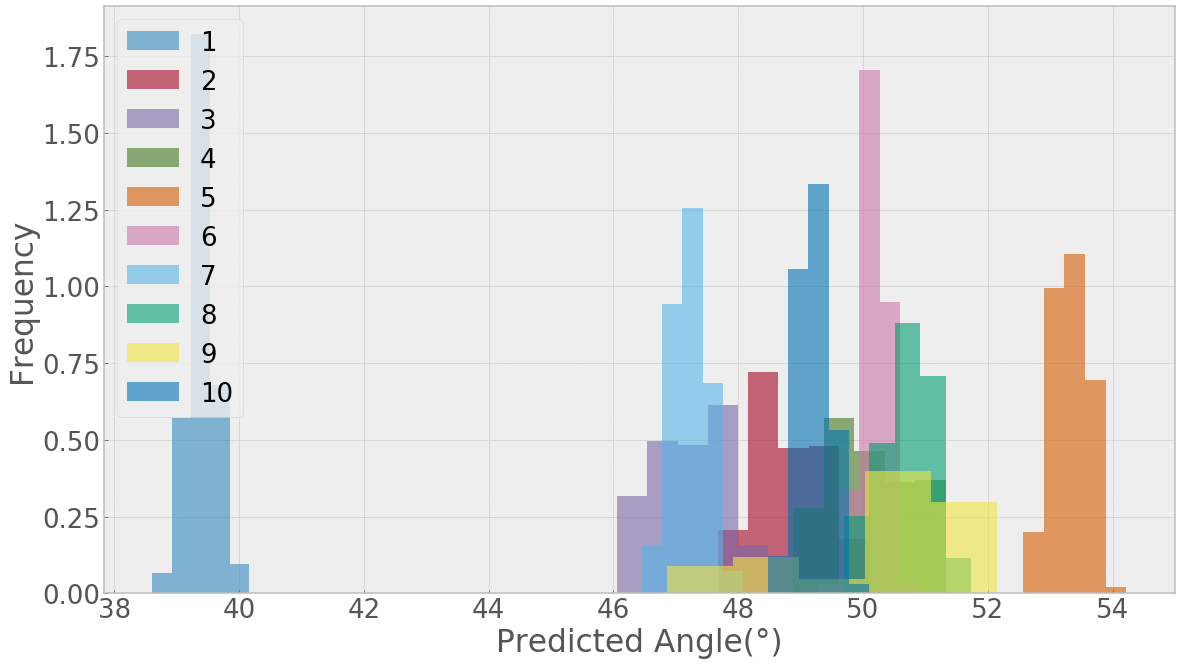

In [14]:
df1.groupby("Trial_id").SquareTheta.plot.hist(bins=5,alpha=0.6,normed=True)
plt.xlabel('Predicted Angle(°)')
plt.legend()


/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


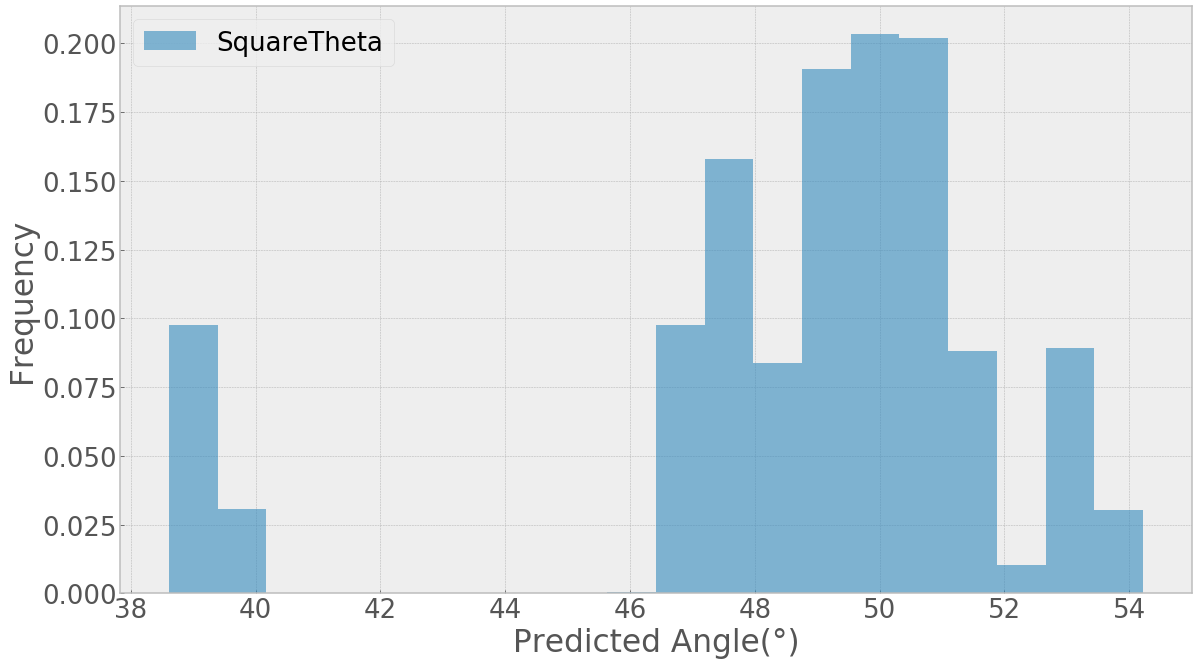

In [15]:
df1.SquareTheta.plot.hist(bins=20,alpha=0.6,normed=True)
plt.xlabel('Predicted Angle(°)')
plt.legend()